In [1]:
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eia = pd.read_pickle('eia_data.pkl')
eia

,dtime,sales,price,sales_smpy,num_accounts
0,2008-01-01,6635,7.86,6320,2195097
1,2008-02-01,6354,7.88,6341,2195066
2,2008-03-01,5641,8.66,5794,2197717
3,2008-04-01,5775,8.94,5737,2200910
4,2008-05-01,6128,9.35,6082,2201846
...,...,...,...,...,...
149,2020-06-01,7818,7.48,8431,2463458
150,2020-07-01,8485,7.63,9037,2467181
151,2020-08-01,8574,7.55,9043,2465769
152,2020-09-01,8042,7.77,9049,2462331


In [3]:
permits = pd.read_pickle('permits.pkl')
permits

,permit_total,dtime
0,1561,2008-01-01
1,1311,2008-02-01
2,1494,2008-03-01
3,2094,2008-04-01
4,1560,2008-05-01
...,...,...
8,1554,2020-07-01
9,1609,2020-08-01
10,1547,2020-09-01
11,1556,2020-10-01


In [4]:
economic = pd.read_pickle('economic_data.pkl')
economic

,dtime,personal_income,real_gdp,consumer_spending
0,2005-01-01,131337.1,245979.3,109377.5
1,2005-02-01,131337.1,245979.3,109377.5
2,2005-03-01,131337.1,245979.3,109377.5
3,2005-04-01,132933.4,248901.1,109377.5
4,2005-05-01,132933.4,248901.1,109377.5
...,...,...,...,...
164,2018-09-01,216152.7,235046.0,168095.0
165,2018-10-01,218781.5,236872.9,168095.0
166,2018-11-01,218781.5,236872.9,168095.0
167,2018-12-01,218781.5,236872.9,168095.0


In [5]:
weather = pd.read_pickle('average_weather.pkl')
weather

,dtime,avg_temp_deg_f,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD
0,2008-01-01,49.893103,70.291034,7.846897,15.106897,0
1,2008-10-01,66.101290,71.061935,5.221935,1.101290,1
2,2008-11-01,57.177931,72.766897,5.836552,7.822069,0
3,2008-12-01,54.577181,76.202013,8.412081,10.422819,0
4,2008-02-01,57.235211,69.325352,8.550000,7.764789,0
...,...,...,...,...,...,...
151,2020-05-01,73.684516,73.688387,7.609032,8.684516,1
152,2020-06-01,80.309333,73.941333,6.800667,15.309333,1
153,2020-07-01,82.293919,80.620270,6.439189,17.293919,1
154,2020-08-01,81.644203,73.165942,6.184783,16.644203,1


In [6]:
state_pop = pd.read_pickle('state_pop.pkl')
state_pop

,dtime,population
0,1900-01-01,1384000.0
1,1900-02-01,1384000.0
2,1900-03-01,1384000.0
3,1900-04-01,1384000.0
4,1900-05-01,1384000.0
...,...,...
1436,2019-09-01,4658285.0
1437,2019-10-01,4658285.0
1438,2019-11-01,4658285.0
1439,2019-12-01,4658285.0


In [7]:
eia_permits = pd.merge(eia, permits, on="dtime")

In [8]:
eia_permits_weather = pd.merge(eia_permits, weather, on="dtime")
eia_permits_weather

,dtime,sales,price,sales_smpy,num_accounts,permit_total,avg_temp_deg_f,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD
0,2008-01-01,6635,7.86,6320,2195097,1561,49.893103,70.291034,7.846897,15.106897,0
1,2008-02-01,6354,7.88,6341,2195066,1311,57.235211,69.325352,8.550000,7.764789,0
2,2008-03-01,5641,8.66,5794,2197717,1494,60.568874,68.307285,9.088742,4.431126,0
3,2008-04-01,5775,8.94,5737,2200910,2094,67.212667,69.818667,7.596667,2.212667,1
4,2008-05-01,6128,9.35,6082,2201846,1560,75.014667,71.646667,7.518000,10.014667,1
...,...,...,...,...,...,...,...,...,...,...,...
148,2020-06-01,7818,7.48,8431,2463458,1751,80.309333,73.941333,6.800667,15.309333,1
149,2020-07-01,8485,7.63,9037,2467181,1554,82.293919,80.620270,6.439189,17.293919,1
150,2020-08-01,8574,7.55,9043,2465769,1609,81.644203,73.165942,6.184783,16.644203,1
151,2020-09-01,8042,7.77,9049,2462331,1547,72.323649,71.053378,7.295270,7.323649,1


/Users/dunleavyjason/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


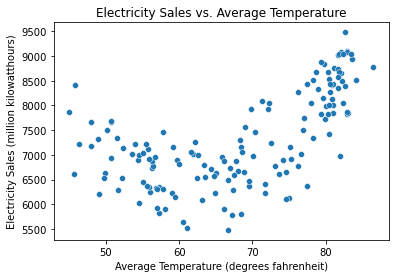

In [9]:
sns.scatterplot(eia_permits_weather["avg_temp_deg_f"],eia_permits_weather["sales"])
plt.xlabel("Average Temperature (degrees fahrenheit)")
plt.ylabel("Electricity Sales (million kilowatthours)")
plt.title("Electricity Sales vs. Average Temperature");

/Users/dunleavyjason/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


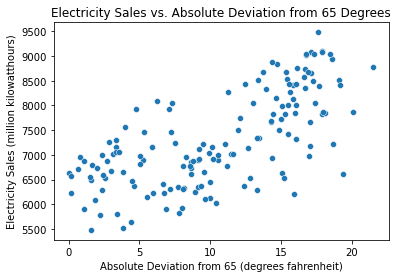

In [10]:
sns.scatterplot(eia_permits_weather["temp_deviation"],eia_permits_weather["sales"])
plt.xlabel("Absolute Deviation from 65 (degrees fahrenheit)")
plt.ylabel("Electricity Sales (million kilowatthours)")
plt.title("Electricity Sales vs. Absolute Deviation from 65 Degrees");

/Users/dunleavyjason/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


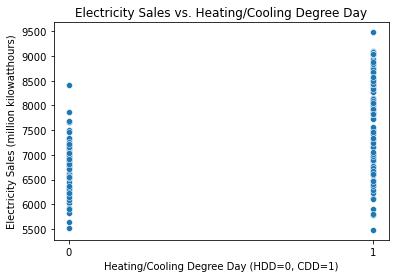

In [11]:
sns.scatterplot(eia_permits_weather["HDD_CDD"],eia_permits_weather["sales"]).set(xticks=[0,1])
plt.xlabel("Heating/Cooling Degree Day (HDD=0, CDD=1)")
plt.ylabel("Electricity Sales (million kilowatthours)")
plt.title("Electricity Sales vs. Heating/Cooling Degree Day");

In [12]:
eia_permits_economic_weather = pd.merge(eia_permits_weather, economic, on="dtime")
eia_permits_economic_weather

,dtime,sales,price,sales_smpy,num_accounts,permit_total,avg_temp_deg_f,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending
0,2008-01-01,6635,7.86,6320,2195097,1561,49.893103,70.291034,7.846897,15.106897,0,163603.3,232658.5,127072.9
1,2008-02-01,6354,7.88,6341,2195066,1311,57.235211,69.325352,8.550000,7.764789,0,163603.3,232658.5,127072.9
2,2008-03-01,5641,8.66,5794,2197717,1494,60.568874,68.307285,9.088742,4.431126,0,163603.3,232658.5,127072.9
3,2008-04-01,5775,8.94,5737,2200910,2094,67.212667,69.818667,7.596667,2.212667,1,170908.0,235378.6,127072.9
4,2008-05-01,6128,9.35,6082,2201846,1560,75.014667,71.646667,7.518000,10.014667,1,170908.0,235378.6,127072.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2018-09-01,8879,7.62,8430,2400894,1354,79.407857,81.647143,5.265000,14.407857,1,216152.7,235046.0,168095.0
129,2018-10-01,8084,7.33,7934,2404131,1285,71.270946,80.922297,6.945946,6.270946,1,218781.5,236872.9,168095.0
130,2018-11-01,6880,7.55,7068,2401511,983,56.240426,81.157447,7.121277,8.759574,0,218781.5,236872.9,168095.0
131,2018-12-01,7230,7.57,7344,2400112,979,53.933333,80.674468,7.639007,11.066667,0,218781.5,236872.9,168095.0


In [13]:
df = pd.merge(eia_permits_economic_weather, state_pop, on="dtime")
df

,dtime,sales,price,sales_smpy,num_accounts,permit_total,avg_temp_deg_f,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population
0,2008-01-01,6635,7.86,6320,2195097,1561,49.893103,70.291034,7.846897,15.106897,0,163603.3,232658.5,127072.9,4435586.0
1,2008-02-01,6354,7.88,6341,2195066,1311,57.235211,69.325352,8.550000,7.764789,0,163603.3,232658.5,127072.9,4435586.0
2,2008-03-01,5641,8.66,5794,2197717,1494,60.568874,68.307285,9.088742,4.431126,0,163603.3,232658.5,127072.9,4435586.0
3,2008-04-01,5775,8.94,5737,2200910,2094,67.212667,69.818667,7.596667,2.212667,1,170908.0,235378.6,127072.9,4435586.0
4,2008-05-01,6128,9.35,6082,2201846,1560,75.014667,71.646667,7.518000,10.014667,1,170908.0,235378.6,127072.9,4435586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2018-09-01,8879,7.62,8430,2400894,1354,79.407857,81.647143,5.265000,14.407857,1,216152.7,235046.0,168095.0,4664450.0
129,2018-10-01,8084,7.33,7934,2404131,1285,71.270946,80.922297,6.945946,6.270946,1,218781.5,236872.9,168095.0,4664450.0
130,2018-11-01,6880,7.55,7068,2401511,983,56.240426,81.157447,7.121277,8.759574,0,218781.5,236872.9,168095.0,4664450.0
131,2018-12-01,7230,7.57,7344,2400112,979,53.933333,80.674468,7.639007,11.066667,0,218781.5,236872.9,168095.0,4664450.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dtime                 133 non-null    datetime64[ns]
 1   sales                 133 non-null    int64         
 2   price                 133 non-null    float64       
 3   sales_smpy            133 non-null    int64         
 4   num_accounts          133 non-null    int64         
 5   permit_total          133 non-null    int64         
 6   avg_temp_deg_f        133 non-null    float64       
 7   avg_dew_humidity_pct  133 non-null    float64       
 8   avg_wind_speed_mph    133 non-null    float64       
 9   temp_deviation        133 non-null    float64       
 10  HDD_CDD               133 non-null    int64         
 11  personal_income       133 non-null    float64       
 12  real_gdp              133 non-null    float64       
 13  consumer_spending   

In [15]:
df.describe()

,sales,price,sales_smpy,num_accounts,permit_total,avg_temp_deg_f,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population
count,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02
mean,7264.766917,7.760075,7160.293233,2.313502e+06,1176.293233,67.645941,73.989873,6.775746,10.550926,0.578947,188739.425564,233561.509774,145209.129323,4.601216e+06
std,943.079473,0.781124,934.134827,6.201456e+04,260.380572,11.743427,4.273247,1.285418,5.726844,0.495595,16322.796353,6376.556267,13745.324513,7.754677e+04
min,5483.000000,6.130000,5483.000000,2.195066e+06,578.000000,44.933333,63.613636,4.445000,0.025850,0.000000,162891.500000,224509.900000,126669.900000,4.435586e+06
25%,6529.000000,7.300000,6365.000000,2.269851e+06,1004.000000,56.940909,71.061935,5.496503,5.527972,0.000000,174227.500000,228200.900000,131421.100000,4.544635e+06
50%,7123.000000,7.700000,7004.000000,2.314636e+06,1154.000000,68.384000,74.014729,6.984138,10.558156,1.000000,190372.200000,233518.700000,143571.100000,4.626040e+06
75%,8004.000000,8.130000,7922.000000,2.368596e+06,1297.000000,79.437008,76.789796,7.752414,15.535915,1.000000,201295.900000,236978.100000,157367.200000,4.666998e+06
max,9481.000000,11.070000,9481.000000,2.404575e+06,2270.000000,86.527742,85.499225,9.884667,21.527742,1.000000,219092.000000,250534.900000,173167.000000,4.681346e+06


In [16]:
df.to_pickle('df.pkl')